# Project 3 - Buffalo 311 Open Data Forecast
---
DAT 512 Canisius College <br>
Kelsey Dayer <br>
<br>

### Full Year Forecast
<br>

### Sections
- [Importing the Data](#importing-data)
- [Data Cleaning and Manipulation](#data-cleaning)
- [Full Year Forecast](#forecasting)

In [1]:
import numpy as np
import requests
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
pd.options.display.max_colwidth = 75
pd.options.display.max_columns = 20
np.set_printoptions(precision=4, suppress=True)

<a id='importing_data'></a>
# Importing the Data

In [2]:
#read in the 311 Service Call data
#imported using API

uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'

params_dict = {
    '$limit':2000000
}

r = requests.get(uri, params = params_dict)
print('Status code ',r.status_code)
print('Number of rows returned ',len(r.json()))
print('Endoced URI with params ',r.url)

Status code  200
Number of rows returned  1046001
Endoced URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json?%24limit=2000000


In [3]:
buffData = pd.DataFrame(r.json())
print(buffData.shape)

(1046001, 48)


In [4]:
buffData.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,1001804417,2023-03-06T10:47:00.000,2023-03-15T08:38:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,21,8,12,3,12,69,223,5,NaN,NaN
1,1001824819,2023-04-20T11:03:00.000,2023-04-26T08:08:00.000,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,22,3,12,3,18,83,8,9,NaN,NaN
2,508695-1001788285,2023-02-05T20:15:00.000,2023-02-15T08:38:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,34,8,10,1,35,75,245,2,NaN,NaN
3,1001804204,2023-03-03T15:29:00.000,NaN,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,15,17,8,4,17,28,31,5,Hagen St,NaN
4,1001803670,2023-03-01T15:01:00.000,2023-03-06T10:57:00.000,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,59,7,6,4,21,11,107,8,NaN,3


In [5]:
buffData['open_date'] = pd.to_datetime(buffData['open_date']).dt.date

In [6]:
buffData.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,1001804417,2023-03-06,2023-03-15T08:38:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,201,BARNARD,...,21,8,12,3,12,69,223,5,NaN,NaN
1,1001824819,2023-04-20,2023-04-26T08:08:00.000,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,69,ST JOHNS PKSD,...,22,3,12,3,18,83,8,9,NaN,NaN
2,508695-1001788285,2023-02-05,2023-02-15T08:38:00.000,Closed,Utilities,National Grid,Streetlights (Req_Serv),Property,16,LOMBARD,...,34,8,10,1,35,75,245,2,NaN,NaN
3,1001804204,2023-03-03,NaN,Open,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Lang Ave,...,15,17,8,4,17,28,31,5,Hagen St,NaN
4,1001803670,2023-03-01,2023-03-06T10:57:00.000,Closed,Dept of Public Works,Sanitation,Pick and Pay (Req_Serv),Property,3,VIOLA,...,59,7,6,4,21,11,107,8,NaN,3


In [7]:
holidays="C:/Users/kelda/Downloads/archive/hol.csv"
holidays=pd.read_csv(holidays)
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [8]:
holidays['Date'] = pd.to_datetime(holidays['Date']).dt.date

<a id='data_cleaning'></a>
# Data Cleaning and Manipulation

In [9]:
#create a dataframe subset of all calls between 2015 and 2022

totalCalls = buffData[['open_date']]
totalCalls.head()

,open_date
0,2023-03-06
1,2023-04-20
2,2023-02-05
3,2023-03-03
4,2023-03-01


In [10]:
totalCalls = totalCalls.groupby(totalCalls['open_date'])['open_date'].count().reset_index(name="count")

totalCalls.head()

,open_date,count
0,2008-07-28,1
1,2008-07-29,170
2,2008-07-30,211
3,2008-07-31,249
4,2008-08-01,178


In [11]:
totalCalls = totalCalls[totalCalls['open_date'] >= pd.to_datetime('2015-01-01').date()]
totalCalls.head()

,open_date,count
2322,2015-01-01,2
2323,2015-01-02,159
2324,2015-01-03,19
2325,2015-01-04,10
2326,2015-01-05,238


In [12]:
totalCalls = totalCalls[totalCalls['open_date'] <= pd.to_datetime('2022-12-31').date()]
totalCalls.tail()

,open_date,count
5217,2022-12-27,1290
5218,2022-12-28,1009
5219,2022-12-29,800
5220,2022-12-30,558
5221,2022-12-31,52


In [13]:
#add in column to indictae if day is a US holiday or not
totalCalls['isHoliday'] = totalCalls['open_date'].isin(holidays['Date'])

In [14]:
totalCalls.head()

,open_date,count,isHoliday
2322,2015-01-01,2,True
2323,2015-01-02,159,False
2324,2015-01-03,19,False
2325,2015-01-04,10,False
2326,2015-01-05,238,False


<a id='forecasting'></a>
# Full Year Forecast

In [15]:
import statsmodels.api as sm
totalCalls = pd.get_dummies(totalCalls, columns=['isHoliday'], drop_first = True)

In [28]:
totalCalls.head()

,count,isHoliday_True
open_date,,
2015-01-01,2,1
2015-01-02,159,0
2015-01-03,19,0
2015-01-04,10,0
2015-01-05,238,0


In [27]:
totalCalls.dropna(inplace=True)
totalCalls.set_index('open_date',inplace=True)

KeyError: "None of ['open_date'] are in the columns"

<AxesSubplot:xlabel='open_date'>

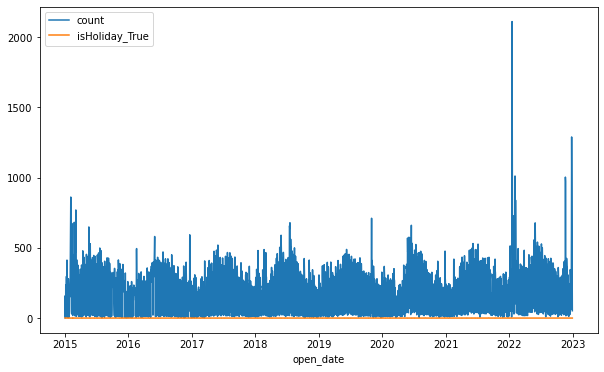

In [30]:
totalCalls.plot()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [48]:
model=sm.tsa.statespace.SARIMAX(totalCalls['count'],order=(1,1,1),seasonal_order=(0,1,1,12))
result=model.fit()

C:\Users\kelda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kelda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                 2899
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -18335.555
Method:                       css-mle   S.D. of innovations            135.006
Date:                Thu, 11 May 2023   AIC                          36687.110
Time:                        00:05:16   BIC                          36734.887
Sample:                             1   HQIC                         36704.325
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0178      0.101      0.177      0.860      -0.179       0.215
ar.L1.D.count     0.4683      0.042     11.130      0.000       0.386       0.551
ar.L2.D.count    -0.6822      0.025    -27.663      0.000      -0.731      -0.634
ma.L1.D.count    -0.9158      0.040    -23.032      0.000      -0.994      -0.838
ma.L2.D.count     0.5769      0.043     13.563      0.000       0.494       0.660
ma.L3.D.count    -0.1297      0.026     -4.912      0.000      -0.181      -0.078
ma.L4.D.count    -0.4835      0.019    -25.907      0.000      -0.520      -0.447
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3432           -1.1610j            1.2107           -0.2043
AR.2            0.3432           +1.1610j            1.2107            0.2043
MA.1            1.0223           -0.0000j            1.0223           -0.0000
MA.2            0.2684           -1.0174j            1.0522           -0.2089
MA.3            0.2684           +1.0174j            1.0522            0.2089
MA.4           -1.8274           -0.0000j            1.8274           -0.5000
-----------------------------------------------------------------------------
"""

In [50]:
totalCalls.tail(50)

,count,isHoliday_True,forcast_SARIMA_1
open_date,,,
2022-11-12,24,0,NaN
2022-11-13,27,0,NaN
2022-11-14,402,0,NaN
2022-11-15,362,0,NaN
2022-11-16,320,0,NaN
2022-11-17,246,0,NaN
2022-11-18,406,0,NaN
2022-11-19,243,0,NaN
2022-11-20,335,0,NaN


<AxesSubplot:xlabel='open_date'>

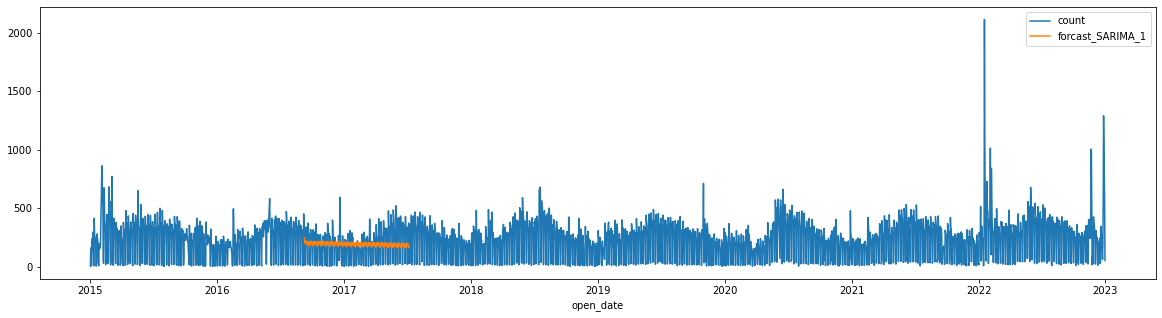

In [65]:
totalCalls['forcast_SARIMA_1']=result.predict(start=600, end=900, dynamic=True)
totalCalls[['count','forcast_SARIMA_1']].plot(figsize=(20, 5))

In [66]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2023-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(0,365)]
future_prediction = pd.DataFrame(index=date_list, columns= totalCalls.columns)
data = pd.concat([totalCalls, future_prediction])

In [67]:
data.shape

(3265, 3)

In [68]:
data.tail()

,count,isHoliday_True,forcast_SARIMA_1
2023-12-27 00:00:00,NaN,NaN,NaN
2023-12-28 00:00:00,NaN,NaN,NaN
2023-12-29 00:00:00,NaN,NaN,NaN
2023-12-30 00:00:00,NaN,NaN,NaN
2023-12-31 00:00:00,NaN,NaN,NaN


C:\Users\kelda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\kelda\anaconda3\lib\site-packages\pandas\core\indexes\base.py:1963: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing


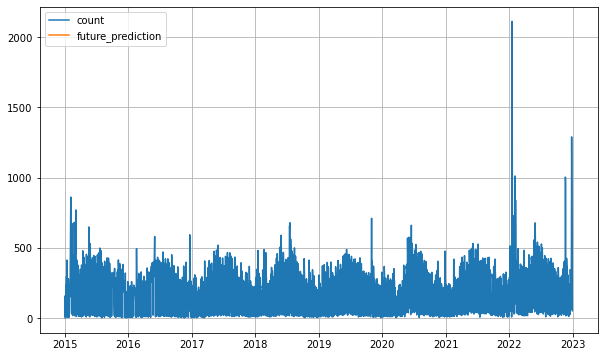

In [69]:
data['future_prediction']=result.predict(start=2900, end=3265, dynamic=True)
data[['count','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

The predictions do not seem to be following any of the same fluctuations as the real data, instead it seems to be displaying some sort of average value. To predict the future year I added a years worth of datetime values to the data to fill with predicitions. I am unsure if the predicitions filled in correctly, they are not plotting on the graph and I cannot figure out why. 